## Loading and cleaning the dataset

In [1]:
# Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load and Read the first file
data1 = pd.read_excel("service_type_report.xlsx")

# Work on the column names to remove the spaces
data1.columns = [column.replace(" ", "_") for column in data1.columns]
data1.head()

,Request_Number,Service_Type
0,EGP2212,Financial
1,EGP2213,Advertising
2,EGP2214,Financial
3,EGP2215,Financial
4,EGP2216,Advertising


In [3]:
# Checking the data types of each column and if there are missing values
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Request_Number  1152 non-null   object
 1   Service_Type    1152 non-null   object
dtypes: object(2)
memory usage: 18.1+ KB


In [4]:
# Load and read the second file
data2 = pd.read_excel("request_status_report.xlsx")

# Work on the column names to remove the spaces
data2.columns = [column.replace(" ", "_") for column in data2.columns]
data2.head()

,Request_Number,Quotation_Amount,Paid_Amount,Request_Status
0,EGP2212,120,149.5,Completed
1,EGP2213,120,299.0,Completed
2,EGP2214,120,299.0,Completed
3,EGP2215,120,299.0,Completed
4,EGP2216,120,299.0,Completed


In [5]:
# Checking the data types of each column and if there are missing values
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request_Number    1152 non-null   object 
 1   Quotation_Amount  1152 non-null   int64  
 2   Paid_Amount       1152 non-null   float64
 3   Request_Status    1152 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 36.1+ KB


In [6]:
# Load and read the third file
data3 = pd.read_excel("locations_report.xlsx")

# Work on the column names to remove the spaces 
data3.columns = [column.replace(" ", "_") for column in data3.columns]
data3.head()

,Request_Number,Date,Province,Lon,Lat
0,EGP2212,2021-11-26,Najran,45.313961,17.984637
1,EGP2213,2021-11-26,Najran,45.313961,17.984637
2,EGP2214,2021-11-26,Najran,45.313961,17.984637
3,EGP2215,2021-11-26,Najran,45.313961,17.984637
4,EGP2216,2021-11-27,Eastern,47.099382,27.851423


In [7]:
# Checking the data types of each column and if there are missing values
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Request_Number  1152 non-null   object        
 1   Date            1152 non-null   datetime64[ns]
 2   Province        1152 non-null   object        
 3   Lon             1152 non-null   float64       
 4   Lat             1152 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 45.1+ KB


In [8]:
# Performing a JOIN for the 3 files ON the Request_Number (Unique)
data = data1.merge(data2,on='Request_Number').merge(data3,on='Request_Number')

# Reading the new dataframe
data

,Request_Number,Service_Type,Quotation_Amount,Paid_Amount,Request_Status,Date,Province,Lon,Lat
0,EGP2212,Financial,120,149.5,Completed,2021-11-26,Najran,45.313961,17.984637
1,EGP2213,Advertising,120,299.0,Completed,2021-11-26,Najran,45.313961,17.984637
2,EGP2214,Financial,120,299.0,Completed,2021-11-26,Najran,45.313961,17.984637
3,EGP2215,Financial,120,299.0,Completed,2021-11-26,Najran,45.313961,17.984637
4,EGP2216,Advertising,120,299.0,Completed,2021-11-27,Eastern,47.099382,27.851423
...,...,...,...,...,...,...,...,...,...
1147,EGP3359,Financial,760,299.0,Completed,2022-09-08,Riyadh,45.739918,23.085563
1148,EGP3360,Financial,760,299.0,Completed,2022-09-09,Riyadh,45.739918,23.085563
1149,EGP3361,Financial,860,299.0,Completed,2022-09-09,Riyadh,45.739918,23.085563
1150,EGP3362,Financial,860,299.0,Completed,2022-09-09,Riyadh,45.739918,23.085563


In [9]:
# Checking the data types of each column and if there are missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 0 to 1151
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Request_Number    1152 non-null   object        
 1   Service_Type      1152 non-null   object        
 2   Quotation_Amount  1152 non-null   int64         
 3   Paid_Amount       1152 non-null   float64       
 4   Request_Status    1152 non-null   object        
 5   Date              1152 non-null   datetime64[ns]
 6   Province          1152 non-null   object        
 7   Lon               1152 non-null   float64       
 8   Lat               1152 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 90.0+ KB


In [10]:
# looking through the data we can extract the 'Year', 'Month' and 'Day' from the 'Date' column
data['Day'] = data['Date'].dt.strftime('%d')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data.head()

,Request_Number,Service_Type,Quotation_Amount,Paid_Amount,Request_Status,Date,Province,Lon,Lat,Day,Year,Month
0,EGP2212,Financial,120,149.5,Completed,2021-11-26,Najran,45.313961,17.984637,26,2021,11
1,EGP2213,Advertising,120,299.0,Completed,2021-11-26,Najran,45.313961,17.984637,26,2021,11
2,EGP2214,Financial,120,299.0,Completed,2021-11-26,Najran,45.313961,17.984637,26,2021,11
3,EGP2215,Financial,120,299.0,Completed,2021-11-26,Najran,45.313961,17.984637,26,2021,11
4,EGP2216,Advertising,120,299.0,Completed,2021-11-27,Eastern,47.099382,27.851423,27,2021,11


### Analysis Starts

### Total Number of requests

In [11]:
print("Number of requests is ->", format(data.shape[0], ",.2f"))

Number of requests is -> 1,152.00


### Service Request by Month

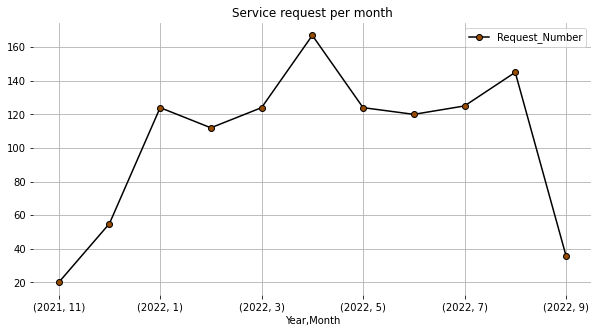

In [12]:
teats = ['Request_Number', 'Month', 'Year']
data[teats].groupby(['Year', 'Month']).count().plot(figsize=(10, 5),
                                                    marker='o',
                                                    color='black',
                                                    markerfacecolor="#964B00",
                                                    grid=True)
plt.title("Service request per month")
plt.box(False)
plt.show()

### Average of daily requests

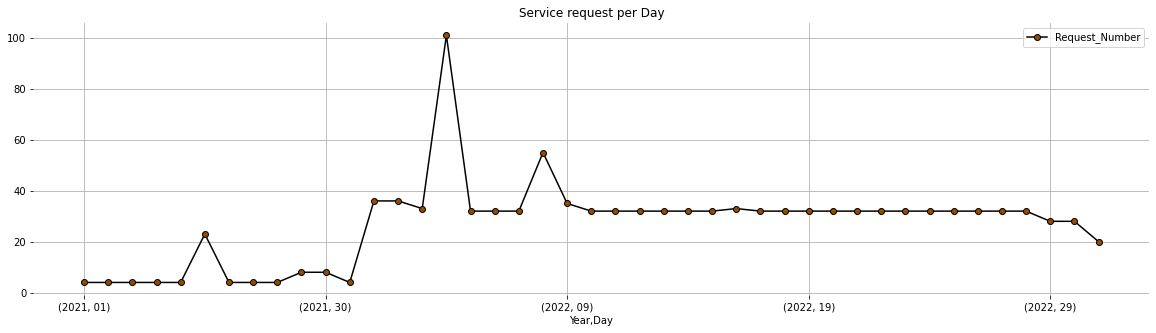

In [13]:
t = ['Request_Number', 'Day', 'Year']
data[t].groupby(['Year', 'Day']).count().plot(figsize=(20, 5),
                                              marker='o',
                                              color='black',
                                              markerfacecolor="#964B00",
                                              grid=True)
plt.title("Service request per Day")
plt.box(False)
plt.show()

### Completed, Pending and Cancelled requests

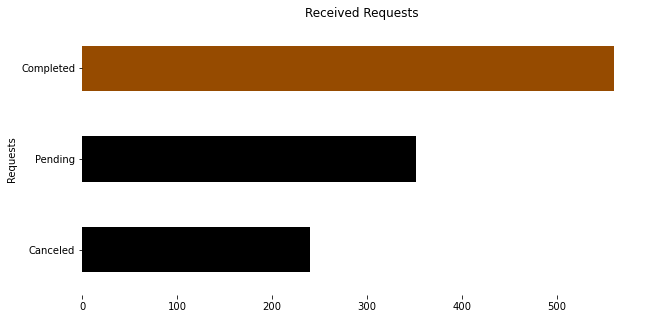

In [14]:
color = ["black", "black", "#964B00"]
data.Request_Status.value_counts().sort_values().plot(kind='barh',
                                                      color=color,
                                                      figsize=(10, 5))
plt.box(False)
plt.title("Received Requests")
plt.ylabel("Requests")
plt.show()

### Total Paid Amounts

In [15]:
print("Total Paid Amount is -> N", format(data.Paid_Amount.sum(), ",.2f"))

Total Paid Amount is -> N 562,097.00


### Paid Amounts by month

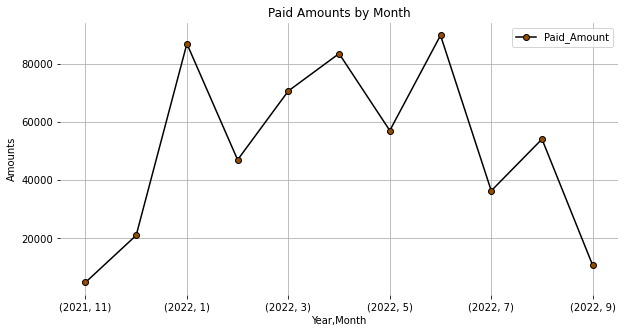

In [16]:
t = ['Paid_Amount', 'Month', 'Year']
data[t].groupby(['Year', 'Month']).sum().plot(figsize=(10, 5),
                                              marker='o',
                                              markerfacecolor="#964B00",
                                              color="black",
                                              grid=True)
plt.box(False)
plt.title("Paid Amounts by Month")
plt.ylabel("Amounts")
plt.show()

### Paid amounts versus Quotation amounts

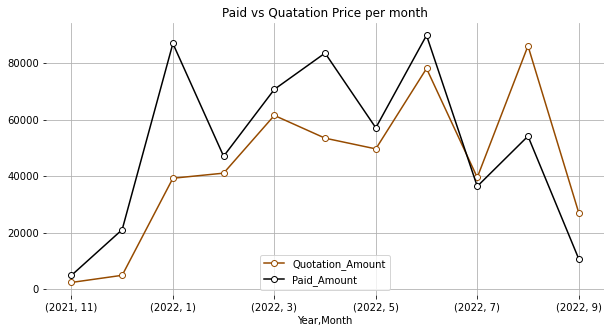

In [17]:
# Trend by month
color=["#964B00", "black"]
d = ['Quotation_Amount','Paid_Amount', 'Year', 'Month']
data[d].groupby(['Year', 'Month']).sum().plot(figsize=(10, 5),
                                              marker='o',
                                              color=color,
                                              markerfacecolor="white",
                                              grid=True)
plt.box(False)
plt.title("Paid vs Quatation Price per month")
plt.show()

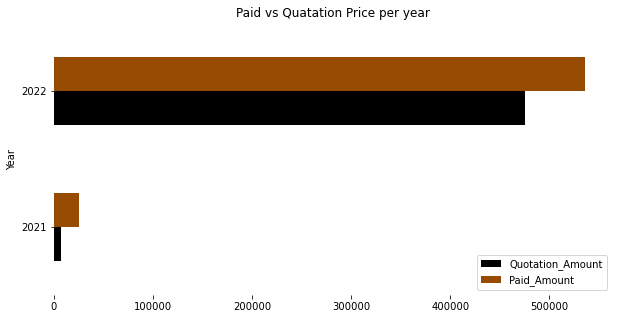

In [18]:
# Trend by Year
color=["black", "#964B00"]
f = ['Quotation_Amount','Paid_Amount', 'Year']
data[f].groupby(['Year']).sum().plot(kind='barh',
                                     figsize=(10, 5),
                                     color=color)
plt.box(False)
plt.title("Paid vs Quatation Price per year")
plt.show()

In [19]:
data.head()

,Request_Number,Service_Type,Quotation_Amount,Paid_Amount,Request_Status,Date,Province,Lon,Lat,Day,Year,Month
0,EGP2212,Financial,120,149.5,Completed,2021-11-26,Najran,45.313961,17.984637,26,2021,11
1,EGP2213,Advertising,120,299.0,Completed,2021-11-26,Najran,45.313961,17.984637,26,2021,11
2,EGP2214,Financial,120,299.0,Completed,2021-11-26,Najran,45.313961,17.984637,26,2021,11
3,EGP2215,Financial,120,299.0,Completed,2021-11-26,Najran,45.313961,17.984637,26,2021,11
4,EGP2216,Advertising,120,299.0,Completed,2021-11-27,Eastern,47.099382,27.851423,27,2021,11


### Service Types by amount (Paid and Quotation)

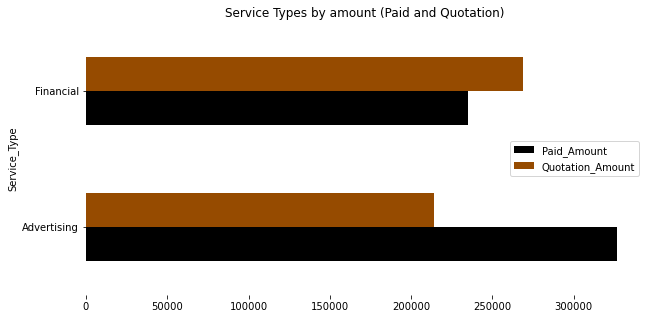

In [20]:
color=["black", "#964B00"]
df = ["Service_Type", "Paid_Amount", "Quotation_Amount"]
data[df].groupby('Service_Type').sum().plot(kind='barh',
                                            figsize=(10, 5),
                                            color=color)
plt.box(False)
plt.title("Service Types by amount (Paid and Quotation)")
plt.show()

### Service Types (Count)

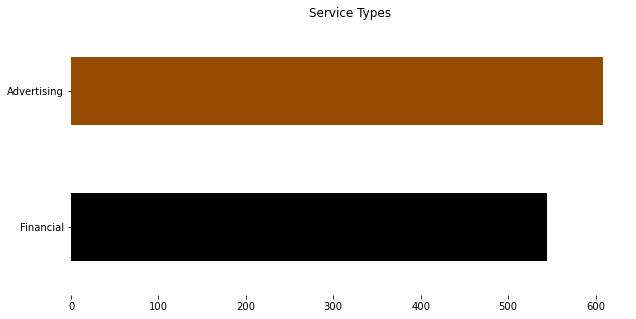

In [21]:
color = ["black", "#964B00"]
data.Service_Type.value_counts().sort_values().plot(kind='barh',
                                                    figsize=(10, 5),
                                                    color=color)
plt.title("Service Types")
plt.box(None)
plt.show()

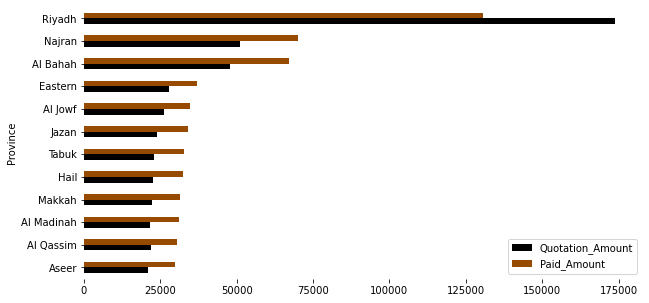

In [22]:
fd = ["Quotation_Amount", "Paid_Amount", "Province"]
color = ["black", "#964B00"]
data[fd].groupby('Province').sum().sort_values(by='Paid_Amount').plot(kind='barh',
                                                                      figsize=(10, 5),
                                                                      color=color)
plt.title("")
plt.box(None)
plt.show()

### Total paid amount by Province (Bar Chart)

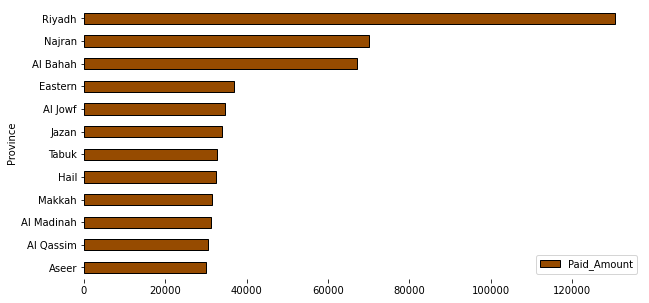

In [23]:
colors=["#964B00"]
ds = ["Paid_Amount", "Province"]
data[ds].groupby('Province').sum().sort_values(by='Paid_Amount').plot(kind='barh',
                                                                      figsize=(10, 5),
                                                                      color=colors,
                                                                      edgecolor="black")
plt.box(None)
plt.show()

In [24]:
data

,Request_Number,Service_Type,Quotation_Amount,Paid_Amount,Request_Status,Date,Province,Lon,Lat,Day,Year,Month
0,EGP2212,Financial,120,149.5,Completed,2021-11-26,Najran,45.313961,17.984637,26,2021,11
1,EGP2213,Advertising,120,299.0,Completed,2021-11-26,Najran,45.313961,17.984637,26,2021,11
2,EGP2214,Financial,120,299.0,Completed,2021-11-26,Najran,45.313961,17.984637,26,2021,11
3,EGP2215,Financial,120,299.0,Completed,2021-11-26,Najran,45.313961,17.984637,26,2021,11
4,EGP2216,Advertising,120,299.0,Completed,2021-11-27,Eastern,47.099382,27.851423,27,2021,11
...,...,...,...,...,...,...,...,...,...,...,...,...
1147,EGP3359,Financial,760,299.0,Completed,2022-09-08,Riyadh,45.739918,23.085563,08,2022,9
1148,EGP3360,Financial,760,299.0,Completed,2022-09-09,Riyadh,45.739918,23.085563,09,2022,9
1149,EGP3361,Financial,860,299.0,Completed,2022-09-09,Riyadh,45.739918,23.085563,09,2022,9
1150,EGP3362,Financial,860,299.0,Completed,2022-09-09,Riyadh,45.739918,23.085563,09,2022,9


In [25]:
lis = data[['Province', 'Paid_Amount', 'Quotation_Amount']].groupby('Province').sum()
li = lis.copy()
li.reset_index(inplace=True)
a = [pd.unique(data.Province.values), pd.unique(data.Lat), pd.unique(data.Lon)]

sa = pd.DataFrame(a, index=None).transpose()
colmns = ['Province', 'Lat', 'Lon']
sa.columns=colmns
n_data = sa.merge(li, on="Province", how='left')
n_data.dropna(inplace=True)
n_data

,Province,Lat,Lon,Paid_Amount,Quotation_Amount
0,Najran,17.984637,45.313961,70127.0,50966.0
1,Eastern,27.851423,47.099382,36926.5,27694.0
2,Riyadh,23.085563,45.739918,130674.5,173944.0
3,Al Bahah,19.690374,41.236239,67206.0,47906.0
4,Aseer,19.356024,42.917622,29900.0,20884.0
5,Al Qassim,26.285344,43.088743,30509.5,21814.0
6,Al Madinah,24.344652,40.913071,31234.0,21754.0
7,Makkah,21.780582,41.720152,31464.0,22214.0
8,Tabuk,27.81121,37.045381,32832.5,23074.0
9,Hail,27.776167,40.540493,32545.0,22525.0


In [26]:
import folium
map_new=folium.Map(location=[data['Lat'].mean(), data['Lon'].mean()] ,zoom_start= 6, tiles='openstreetmap')

folium.TileLayer('openstreetmap').add_to(map_new)
folium.TileLayer('Stamen Terrain').add_to(map_new)
folium.TileLayer('Stamen Toner').add_to(map_new)
folium.TileLayer('Stamen Water Color').add_to(map_new)
folium.TileLayer('cartodbpositron').add_to(map_new)
folium.TileLayer('cartodbdark_matter').add_to(map_new)
folium.LayerControl().add_to(map_new)

list_coor=n_data[['Province', 'Lat', 'Lon', 'Paid_Amount', 'Quotation_Amount']].values.tolist()

for i in list_coor:
    map_new.add_child(folium.Marker(location=[i[1],i[2]],
                                    popup=f"Province = {i[0]}<br> Total Paid = {i[3]}<br> Total Quotation = {i[4]}",
                                    icon=folium.Icon(color='#964B00')))
title_html = '''
             <h3 align="center" style="font-size:20px"><b>An Interactive map showing paid and quotaion amount per region</b></h3>
             '''
map_new.get_root().html.add_child(folium.Element(title_html))
map_new.save(outfile= "test.html")
map_new

# End of my notebook